# Feature Extraction

Get the data 10 % of data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [ ]:
!nvidia-smi

Mon Nov 11 05:32:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import zipfile

zip_path = "/content/10_food_classes_10_percent.zip"
zip_ref = zipfile.ZipFile(zip_path, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pathlib
import os

root_path = pathlib.Path("/content/10_food_classes_10_percent")
train_dir = root_path / "train"
test_dir = root_path / "test"

train_dir, test_dir, root_path

(PosixPath('/content/10_food_classes_10_percent/train'),
 PosixPath('/content/10_food_classes_10_percent/test'),
 PosixPath('/content/10_food_classes_10_percent'))

In [ ]:
for dirpath, dirnames, filenames in os.walk(root_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classe

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical", shuffle=True, seed=42)
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical", shuffle=True, seed=42)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
labels = train_data.class_indices
labels

{'chicken_curry': 0,
 'chicken_wings': 1,
 'fried_rice': 2,
 'grilled_salmon': 3,
 'hamburger': 4,
 'ice_cream': 5,
 'pizza': 6,
 'ramen': 7,
 'steak': 8,
 'sushi': 9}

In [ ]:
labels = list(labels.keys())
labels

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
import matplotlib.pyplot as plt
import random
import pathlib
import tensorflow as tf
import numpy as np
import os

def view_random_img_from_IDG(target_data):
  # Get a random batch of data
  batch = next(target_data)

  # Get a random image and label from the batch
  rand_idx = random.randint(0, target_data.batch_size - 1)  # Use batch_size instead of len(target_data[rand_batch])
  img = batch[0][rand_idx]  # Access the image data
  label = batch[1][rand_idx]  # Access the label data

  # Print the shape of the image for debugging
  print(f"Image shape: {img.shape}")

  # Plot the image
  plt.imshow(img)
  plt.title(f"Label: {labels[tf.argmax(label)]}")  # Use the label directly without indexing
  plt.axis(False)
  plt.show()

Image shape: (224, 224, 3)


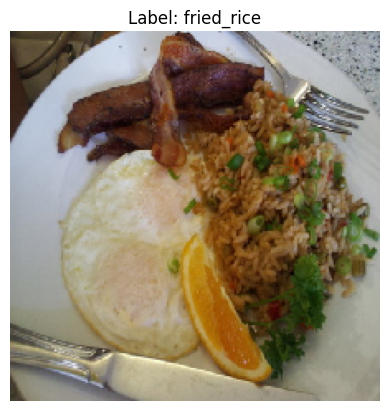

In [ ]:
view_random_img_from_IDG(train_data)

In [ ]:
# Get the pretrianied model


# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
!pip install tf_keras

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tf_keras

def create_model(model_url, num_classes=10):

  hub_layer = hub.KerasLayer(model_url,
                             trainable=False,
                             name='feature_extraction_layer',
                             input_shape=(224, 224,3))

  model = tf_keras.Sequential([
      hub_layer,
      tf_keras.layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [ ]:
model_0 = create_model(resnet_url)
model_1 = create_model(efficientnet_url)

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = 'adam',
                metrics = ["accuracy"])

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = 'adam',
                metrics = ["accuracy"])

In [ ]:
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 30s 962ms/step - loss: 1.8710 - accuracy: 0.3667 - val_loss: 1.1944 - val_accuracy: 0.6152
Epoch 2/5
24/24 [==============================] - 14s 600ms/step - loss: 0.8989 - accuracy: 0.7240 - val_loss: 0.8558 - val_accuracy: 0.7248
Epoch 3/5
24/24 [==============================] - 12s 538ms/step - loss: 0.6288 - accuracy: 0.8093 - val_loss: 0.7726 - val_accuracy: 0.7456
Epoch 4/5
24/24 [==============================] - 12s 530ms/step - loss: 0.4662 - accuracy: 0.8787 - val_loss: 0.7095 - val_accuracy: 0.7636
Epoch 5/5
24/24 [==============================] - 12s 530ms/step - loss: 0.3966 - accuracy: 0.9027 - val_loss: 0.6837 - val_accuracy: 0.7760


In [ ]:
histor_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 25s 665ms/step - loss: 1.8140 - accuracy: 0.4693 - val_loss: 1.2923 - val_accuracy: 0.7404
Epoch 2/5
24/24 [==============================] - 13s 541ms/step - loss: 1.0529 - accuracy: 0.7800 - val_loss: 0.8529 - val_accuracy: 0.8192
Epoch 3/5
24/24 [==============================] - 12s 517ms/step - loss: 0.7523 - accuracy: 0.8387 - val_loss: 0.6995 - val_accuracy: 0.8344
Epoch 4/5
24/24 [==============================] - 12s 506ms/step - loss: 0.5924 - accuracy: 0.8787 - val_loss: 0.5829 - val_accuracy: 0.8664
Epoch 5/5
24/24 [==============================] - 11s 456ms/step - loss: 0.4977 - accuracy: 0.8987 - val_loss: 0.5549 - val_accuracy: 0.8568


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure(figsize=(10, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.show()

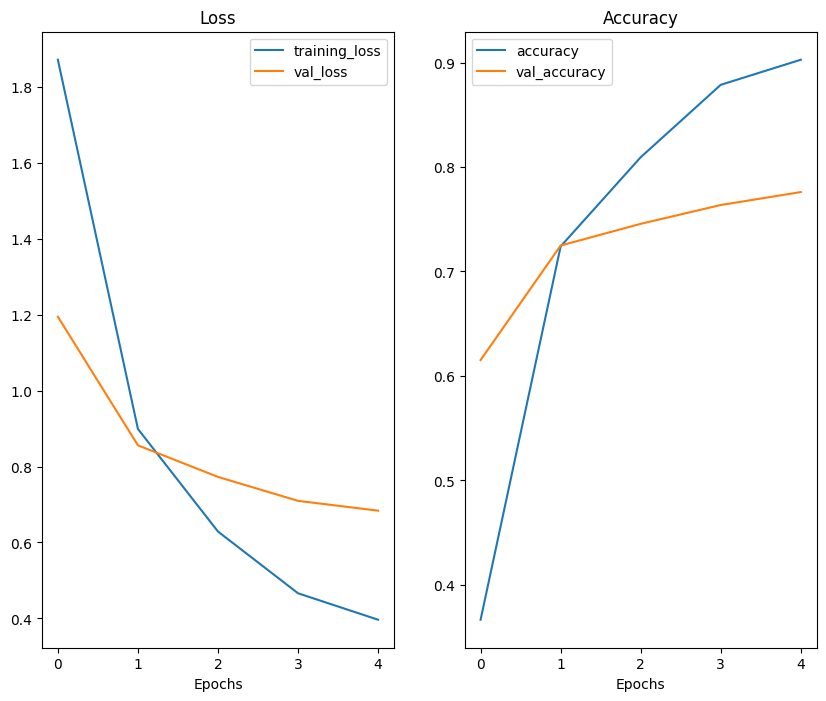

In [ ]:
plot_loss_curves(history_0)

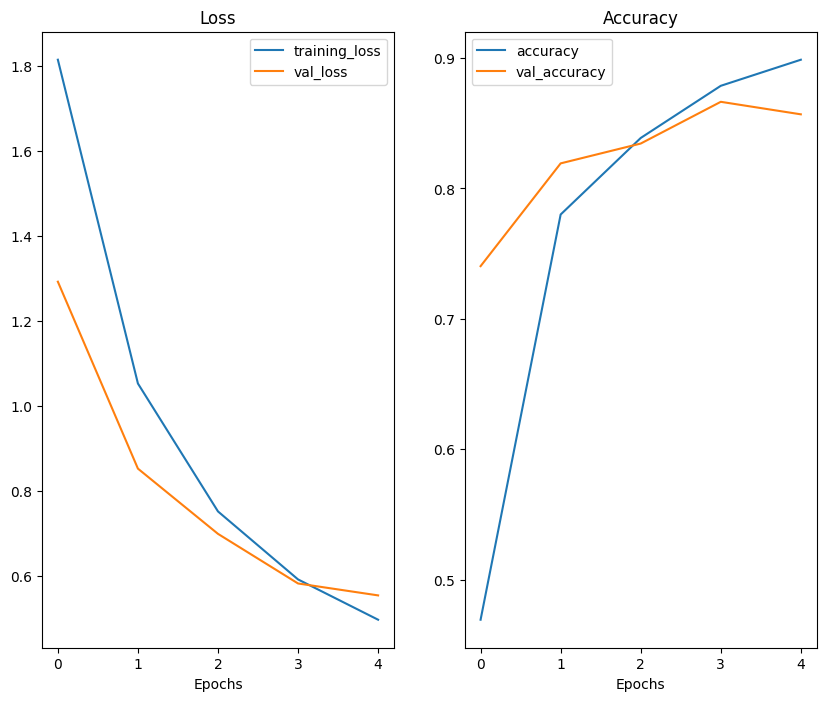

In [ ]:
plot_loss_curves(histor_1)

In [ ]:
model_0.evaluate(test_data)

  27759/Unknown - 2984s 108ms/step - loss: 0.6947 - accuracy: 0.7732

In [ ]:
model_1.evaluate(test_data)

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 8))
for i in range(16):
  # Get a random batch index
  rand_batch = random.randint(0, len(train_data) - 1)

  # Get the data for the batch
  batch_data, batch_labels = train_data[rand_batch]

  # Get a random index within the batch
  rand_idx = random.randint(0, len(batch_data) - 1)  # Ensure index is within batch bounds

  # Access the image
  img = batch_data[rand_idx]

  # Get the true label for the image
  true_label_index = batch_labels[rand_idx].argmax() # Assuming categorical labels
  true_label = labels[true_label_index]

  # Display the image
  plt.subplot(4, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Batch: {rand_batch}, Index: {rand_idx}, Label: {true_label}")
  plt.axis("off")
plt.show()

In [ ]:
y_preds = model_0.predict(test_data)
y_preds[:10]

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_data.classes, y_pred=tf.argmax(y_preds, axis=1))